# Analysis of E. melliodora chamber data

data collected December 2015 - February 2016

Looking for population level differences in traits

Looking for effect between treatments and/or populations or maternal lines.

In [1]:
options(jupyter.plot_mimetypes = "image/png")
library(lme4)
library(lmerTest)
library(ggplot2)

Loading required package: Matrix

Attaching package: ‘Matrix’

The following objects are masked from ‘package:base’:

    crossprod, tcrossprod


Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step



# Data  

In [2]:
### read in raw data
#excel sheet of measurements from Abby saved as a csv
infile_path="/home/megan/Desktop/emel_lb1234/emel_chamber_analysis/chamber/data/" #path to infile
infile="EmelliodoraChamber11.10.16.csv" #infile
indata=read.delim(paste(infile_path, infile, sep="/"),sep=",", strip.white=T) #read in infile
head(indata)

,Line,Individual.Number,Chamber,Position.Tray,Treatment,Plant.ID,Population,Mother,Replicate,Growth.Measure.Date,Growth.Measure.Number,Growth.Measure.Plant.Height.......cm,Growth.Measure.Plant.Height....mm,Growth.Measure.Leaf.Number,Growth.Measure.Longest.Leaf.Length.cm,Growth.Measure.Longest.Leaf.Length.mm,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,Growth.Measure.Branch.Number,Growth.Measure.Total.Branch.Length.....mm,Growth.Measure.Longest.Branch.Length.mm,B2,B3,B4,B5,B6,Health.Indication,Notes,Extra.Information,Comments
1,2,1,35,LFCL,NA,T1.10.16,T1,10,16,12/9/2015,1:1,0.7,7,2,0.3,3,3,.,.,.,.,.,.,.,.,.,.,.,.,0,.,.,.,.,.,.,.,0,established,,
2,3,2,35,LFCL,NA,D.4.4,D,4,4,12/9/2015,1:1,0.5,5,0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0,.,.,.,.,.,.,.,0,established,"(0,0) leaves",
3,4,3,35,LFCL,NA,D.10.4,D,10,4,12/9/2015,1:1,0.8,8,2,0.2,2,2,.,.,.,.,.,.,.,.,.,.,.,.,0,.,.,.,.,.,.,.,0,established,,
4,5,4,35,LFCL,NA,B.8.5,B,8,5,12/9/2015,1:1,0.6,6,2,0.3,3,3,.,.,.,.,.,.,.,.,.,.,.,.,0,.,.,.,.,.,.,.,0,established,,
5,6,5,35,LFCL,NA,B.6.6,B,6,6,12/9/2015,1:1,1,10,2,0.2,2,2,.,.,.,.,.,.,.,.,.,.,.,.,0,.,.,.,.,.,.,.,0,established,,
6,7,6,35,LFCL,NA,B.5.6,B,5,6,12/9/2015,1:1,1.2,12,2,0.3,3,3,.,.,.,.,.,.,.,.,.,.,.,.,0,.,.,.,.,.,.,.,0,established,,


In [3]:
#germination information
germ_infile_path="/home/megan/megan/research/eucalyptus/growth_experiments/emelliodora_experiment1/chamber_layouts"
germ_file1="BVZ0057-traitcapture-db-import.txt"
germ_file2="BVZ0058-traitcapture-db-import.txt"
germ_indata1=read.delim(paste(germ_infile_path, germ_file1, sep="/"), strip.white=T)
germ_indata2=read.delim(paste(germ_infile_path, germ_file2, sep="/"), strip.white=T)
#germ_info=rbind(germ_indata1[,c("PlantName","GrowthLocation")],germ_indata2[,c("PlantName","GrowthLocation")])
germ_info=rbind(germ_indata1,germ_indata2)
germ_info=subset(germ_info, PlantName!="XXXXX")
head(germ_info)

,PlantID,PlantName,AccessionID,ExperimentID,GrowthLocation,Tray,Position,PotNumber
1,26001,11-1-1,A25170,BVZ0057,GC35,1,A1,1
2,26002,11-1-3,A25170,BVZ0057,GC35,1,A2,2
3,26003,11-1-5,A25170,BVZ0057,GC35,1,A3,3
4,26004,11-1-7,A25170,BVZ0057,GC35,1,A4,4
5,26005,11-1-9,A25170,BVZ0057,GC35,1,A5,5
6,26006,11-1-11,A25170,BVZ0057,GC35,1,B1,6


In [4]:
### clean up data

#replace . with NA
indata[indata=="."]=NA 

#remove extra columns
trash=names(indata) %in% c("Line", "Treatment","Plant.ID",
                           "Growth.Measure.Plant.Height.......cm",
                           "Growth.Measure.Longest.Leaf.Length.cm",
                           "Growth.Measure.Longest.Branch.Length.mm","B2","B3","B4","B5","B6",
                           "Notes","Extra.Information","Comments")
indata <- indata[!trash]

##fix some names
colnames(indata)[names(indata)=="Growth.Measure.Plant.Height....mm"]="height"
colnames(indata)[names(indata)=="Growth.Measure.Leaf.Number"]="numleafs"
colnames(indata)[names(indata)=="Growth.Measure.Number"]="Measure.Number"
colnames(indata)[names(indata)=="Growth.Measure.Longest.Leaf.Length.mm"]="L1"
colnames(indata)[names(indata)=="Growth.Measure.Branch.Number"]="numbranch"
colnames(indata)[names(indata)=="Growth.Measure.Total.Branch.Length.....mm"]="totbranchlen"
colnames(indata)[names(indata)=="Growth.Measure.Total.Branch.Length.....mm"]="totbranchlen"

##convert from factors to numeric values 
indata$height=as.numeric(as.character(indata$height))
indata$numleafs=as.numeric(as.character(indata$numleafs))
indata$numbranch=as.numeric(as.character(indata$numbranch))
indata$totbranchlen=as.numeric(as.character(indata$totbranchlen))

#determine total leaf length
indata$longleaf=as.numeric(as.character(indata$L1))  #keep longest leaf measure
sumL=rep(0,length(indata[,1]))
for (i in 1:14)
    {
        index=which(colnames(indata)==paste("L",i,sep=""))   #find index of relevant column
        Lvals=as.numeric(as.character(indata[[index]]))      #get data
        Lvals[is.na(Lvals)]=0                                #set NAs to zero
        sumL=sumL+Lvals                                      #add to sum
        indata <- indata[c(-index)]                          #remove column
    }
indata$totleaflen=sumL
##sum up total leaf length if already numeric
#indata$totleaflen=rowSums(subset(indata, select=L1:L14),na.rm=T)

#determine block from Tray.Position
indata["block"]=NA
indata$block[indata$Position.Tray=="LFL"]="1"
indata$block[indata$Position.Tray=="LFCL"]="1"
indata$block[indata$Position.Tray=="LFCR"]="2"
indata$block[indata$Position.Tray=="LFR"]="2"
indata$block[indata$Position.Tray=="LBL"]="3"
indata$block[indata$Position.Tray=="LBCL"]="3"
indata$block[indata$Position.Tray=="LBCR"]="4"
indata$block[indata$Position.Tray=="LBR"]="4"
indata$block[indata$Position.Tray=="RFL"]="5"
indata$block[indata$Position.Tray=="RFCL"]="5"
indata$block[indata$Position.Tray=="RFCR"]="6"
indata$block[indata$Position.Tray=="RFR"]="6"
indata$block[indata$Position.Tray=="RBL"]="7"
indata$block[indata$Position.Tray=="RBCL"]="7"
indata$block[indata$Position.Tray=="RBCR"]="8"
indata$block[indata$Position.Tray=="RBR"]="8"

#change numeric coding of categories to factors
indata$block=factor(indata$block)
indata$Chamber=factor(indata$Chamber)

##add general treatment condition (chamber 35=hot, chamber 36=warm) and chamber indicator variable
indata["condition"]=NA
indata$condition[indata$Chamber==35]="hot"
indata$condition[indata$Chamber==36]="warm"
indata$condition=factor(indata$condition)
#indata$condition_i[indata$Chamber==35]=1
#indata$condition_i[indata$Chamber==36]=0
#indata$condition_i=factor(indata$condition_i)

#determine maternal line from Population + Mother
indata["matline"]=paste(indata$Population, indata$Mother, sep="-")
indata$matline=factor(indata$matline)

#make a numeric maternal line
indata["matline_num"]=NA
indata$matline_num[indata$matline=="11-1" | indata$matline=="B-3" | indata$matline=="D-4" | 
                   indata$matline=="G-2" |indata$matline=="T1-1" |indata$matline=="T3-3"]=1
indata$matline_num[indata$matline=="11-3" | indata$matline=="B-5" | indata$matline=="D-5" | 
                   indata$matline=="G-3" |indata$matline=="T1-5" |indata$matline=="T3-4"]=2
indata$matline_num[indata$matline=="11-6" | indata$matline=="B-6" | indata$matline=="D-6" | 
                   indata$matline=="G-7" |indata$matline=="T1-6" |indata$matline=="T3-6"]=3
indata$matline_num[indata$matline=="11-7" | indata$matline=="B-7" | indata$matline=="D-7" | 
                   indata$matline=="G-8" |indata$matline=="T1-7" |indata$matline=="T3-7"]=4
indata$matline_num[indata$matline=="11-8" | indata$matline=="B-8" | indata$matline=="D-8" | 
                   indata$matline=="G-9" |indata$matline=="T1-9" |indata$matline=="T3-8"]=5
indata$matline_num[indata$matline=="11-9" | indata$matline=="B-9" | indata$matline=="D-10" | 
                   indata$matline=="G-10" |indata$matline=="T1-10" |indata$matline=="T3-9"]=6

#add germination data
#make matching plant ID
indata$PlantID=paste(indata$Population,"-",indata$Mother,"-",indata$Replicate,sep="")
indata$germch=germ_info$GrowthLocation[match(indata$PlantID,germ_info$PlantName)]

#add treatment days
indata["day"]=NA
indata$day[indata$Growth.Measure.Date=="12/9/2015"]=7
indata$day[indata$Growth.Measure.Date=="12/10/2015"]=8
indata$day[indata$Growth.Measure.Date=="12/16/2015"]=14
indata$day[indata$Growth.Measure.Date=="12/17/2015"]=15
indata$day[indata$Growth.Measure.Date=="12/23/2015"]=21
indata$day[indata$Growth.Measure.Date=="12/24/2015"]=22
indata$day[indata$Growth.Measure.Date=="1/6/2016"]=35
indata$day[indata$Growth.Measure.Date=="1/7/2016"]=36
indata$day[indata$Growth.Measure.Date=="2/15/2016"]=75
indata$day[indata$Growth.Measure.Date=="2/16/2016"]=76
#ignore 6 since it was a partial measurement 


#remove extra columns
trash=names(indata) %in% c("Position.Tray","Growth.Measure.Date")
indata <- indata[!trash]

head(indata)

Warning message:
In eval(expr, envir, enclos): NAs introduced by coercion

,Individual.Number,Chamber,Population,Mother,Replicate,Measure.Number,height,numleafs,numbranch,totbranchlen,Health.Indication,longleaf,totleaflen,block,condition,matline,matline_num,PlantID,germch,day
1,1,35,T1,10,16,1:1,7,2,0,NA,0,3,6,1,hot,T1-10,6,T1-10-16,GC36,7
2,2,35,D,4,4,1:1,5,0,0,NA,0,NA,0,1,hot,D-4,1,D-4-4,GC36,7
3,3,35,D,10,4,1:1,8,2,0,NA,0,2,4,1,hot,D-10,6,D-10-4,GC36,7
4,4,35,B,8,5,1:1,6,2,0,NA,0,3,6,1,hot,B-8,5,B-8-5,GC35,7
5,5,35,B,6,6,1:1,10,2,0,NA,0,2,4,1,hot,B-6,3,B-6-6,GC36,7
6,6,35,B,5,6,1:1,12,2,0,NA,0,3,6,1,hot,B-5,2,B-5-6,GC36,7


In [5]:
#subset to established and measure 4
estb4=subset(indata,Measure.Number=="1:4" & Health.Indication==0)

#ignore measure 6
indata_main=subset(indata, Measure.Number!="1:6")

#subset to get data for the last measurement with 2 or fewer leaves
leaf2=subset(indata_main, numleafs<=2)
leaf2=leaf2[order(leaf2$Individual.Number),]
leaf2=subset(leaf2, !duplicated(Individual.Number, fromLast=T))

# subset to get data for the first measurement with 4 or more leaves
leaf4=subset(indata_main, numleafs>=4)
leaf4=leaf4[order(leaf4$Individual.Number),]
leaf4=subset(leaf4,!duplicated(Individual.Number))
#head(leaf4)

# subset to get data for the first measurement with 8 or more leaves
leaf8=subset(indata_main, numleafs>=8)
leaf8=leaf8[order(leaf8$Individual.Number),]
leaf8=subset(leaf8,!duplicated(Individual.Number))
#head(leaf8)

#merge two sets
#leafdiff=merge(leaf4,leaf8, by="Individual.Number")
leafdiff=merge(leaf2,leaf8, by="Individual.Number")

#clean (rename and remove)
colnames(leafdiff)[names(leafdiff)=="Chamber.x"]="Chamber"
colnames(leafdiff)[names(leafdiff)=="Population.x"]="Population"
colnames(leafdiff)[names(leafdiff)=="Mother.x"]="Mother"
colnames(leafdiff)[names(leafdiff)=="Replicate.x"]="Replicate"
colnames(leafdiff)[names(leafdiff)=="block.x"]="block"
colnames(leafdiff)[names(leafdiff)=="condition.x"]="condition"
colnames(leafdiff)[names(leafdiff)=="matline.x"]="matline"
colnames(leafdiff)[names(leafdiff)=="PlantID.x"]="PlantID"
colnames(leafdiff)[names(leafdiff)=="germch.x"]="germch"
colnames(leafdiff)[names(leafdiff)=="matline_num.x"]="matline_num"

trash=names(leafdiff) %in% c("Chamber.y","Population.y","Mother.y","Replicate.y", "matline_num.y",
                           "block.y","condition.y","matline.y","PlantID.y","germch.y")
leafdiff <- leafdiff[!trash]
head(leafdiff)

,Individual.Number,Chamber,Population,Mother,Replicate,Measure.Number.x,height.x,numleafs.x,numbranch.x,totbranchlen.x,Health.Indication.x,longleaf.x,totleaflen.x,block,condition,matline,matline_num,PlantID,germch,day.x,Measure.Number.y,height.y,numleafs.y,numbranch.y,totbranchlen.y,Health.Indication.y,longleaf.y,totleaflen.y,day.y
1,1,35,T1,10,16,1:1,7,2,0,NA,0,3,6,1,hot,T1-10,6,T1-10-16,GC36,7,1:5,16,24,6,19,0,25,174,76
2,2,35,D,4,4,1:3,6,2,0,NA,0,2,4,1,hot,D-4,1,D-4-4,GC36,21,1:5,8,8,0,NA,0,13,64,75
3,3,35,D,10,4,1:4,9,2,0,NA,2,3,6,1,hot,D-10,6,D-10-4,GC36,35,1:5,14,8,0,NA,2,18,94,75
4,4,35,B,8,5,1:1,6,2,0,NA,0,3,6,1,hot,B-8,5,B-8-5,GC35,7,1:5,22,20,4,6,0,32,222,75
5,5,35,B,6,6,1:4,11,2,0,NA,2,3,6,1,hot,B-6,3,B-6-6,GC36,35,1:5,17,10,1,1,2,17,132,75
6,6,35,B,5,6,1:3,13,2,0,NA,1,5,10,1,hot,B-5,2,B-5-6,GC36,21,1:5,24,18,4,10,1,25,162,75


In [6]:
#(ln(ht2)-ln(ht1))/(t2-t1)
#height
leafdiff$growth=(log(leafdiff$height.y)-log(leafdiff$height.x))/(leafdiff$day.y-leafdiff$day.x)
#total leaf length
leafdiff$leafln=(log(leafdiff$totleaflen.y)-log(leafdiff$totleaflen.x))/(leafdiff$day.y-leafdiff$day.x)
#longest leaf
leafdiff$longleaf=(log(leafdiff$longleaf.y)-log(leafdiff$longleaf.x))/(leafdiff$day.y-leafdiff$day.x)

#remove NA and inf
leafdiff=subset(leafdiff, !is.na(growth))
#leafdiff=subset(leafdiff, !is.na(leafln))
leafdiff=subset(leafdiff, !is.na(longleaf))
leafdiff=subset(leafdiff, !is.infinite(growth))
#leafdiff=subset(leafdiff, !is.infinite(leafln))
leafdiff=subset(leafdiff, !is.infinite(longleaf))

# visualize data

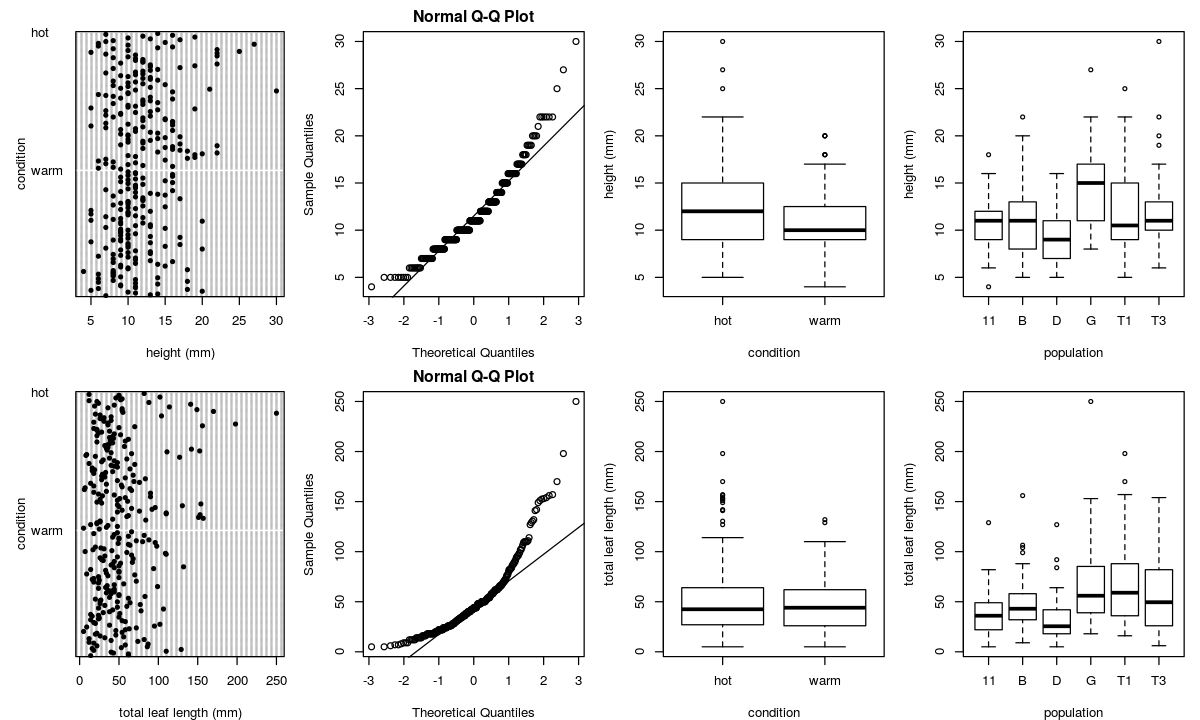

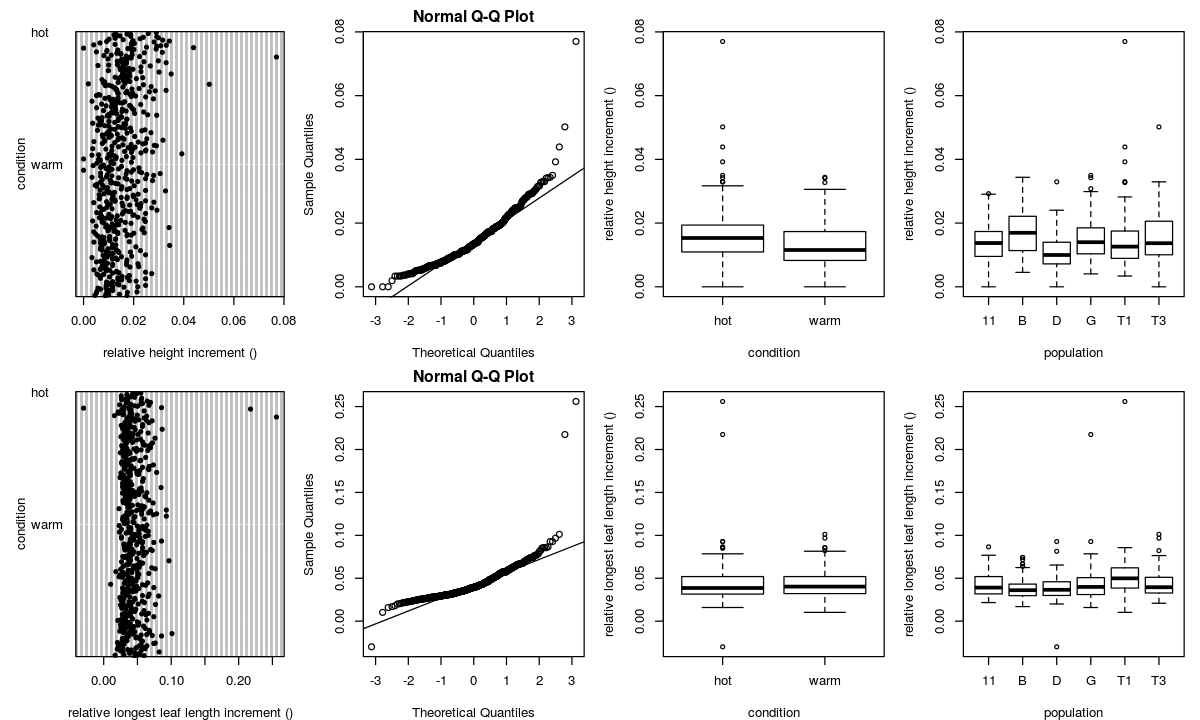

In [7]:
#dot chart, qq plot, box plots 
par(mfrow=c(2,4), mar=c(4,4,2,1))
options(repr.plot.width=10, repr.plot.height=6)

#height
dotchart(estb4$height, groups=estb4$condition, 
         xlab="height (mm)", ylab="condition", pch=20)
qqnorm(estb4$height)
qqline(estb4$height)
boxplot(height ~ condition, data=estb4, xlab="condition",ylab="height (mm)")
boxplot(height ~ Population, data=estb4, xlab="population",ylab="height (mm)")

#total leaf length
dotchart(estb4$totleaflen, groups=estb4$condition, 
         xlab="total leaf length (mm)", ylab="condition", pch=20)
qqnorm(estb4$totleaflen)
qqline(estb4$totleaflen)
boxplot(totleaflen ~ condition, data=estb4, xlab="condition",ylab="total leaf length (mm)")
boxplot(totleaflen ~ Population, data=estb4, xlab="population",ylab="total leaf length (mm)")

#growth
dotchart(leafdiff$growth, groups=leafdiff$condition, 
         xlab="relative height increment ()", ylab="condition", pch=20)
qqnorm(leafdiff$growth)
qqline(leafdiff$growth)
boxplot(growth ~ condition, data=leafdiff, xlab="condition",ylab="relative height increment ()")
boxplot(growth ~ Population, data=leafdiff, xlab="population",ylab="relative height increment ()")

#longest leaf length
dotchart(leafdiff$longleaf, groups=leafdiff$condition, 
         xlab="relative longest leaf length increment ()", ylab="condition", pch=20)
qqnorm(leafdiff$longleaf)
qqline(leafdiff$longleaf)
boxplot(longleaf ~ condition, data=leafdiff, xlab="condition",ylab="relative longest leaf length increment ()")
boxplot(longleaf ~ Population, data=leafdiff, xlab="population",ylab="relative longest leaf length increment ()")

In [19]:
#pdf of select box plots
pdf("chamber_box.pdf", width=4, height=5.25)
par(mfrow=c(3,2), mar=c(4,4,0.5,0.5))

#height
boxplot(height ~ condition, data=estb4, ylab="height (mm)")
boxplot(height ~ Population, data=estb4)

#leaf len
boxplot(totleaflen ~ condition, data=estb4,ylab="total leaf length (mm)")
boxplot(totleaflen ~ Population, data=estb4)

#rel ht
boxplot(growth ~ condition, data=leafdiff, xlab="treatment",ylab="")
mtext(text="relative height increment", side=2, cex=.75, line=3)
mtext(text="(per day)", side=2, cex=.75, line=2)
boxplot(growth ~ Population, data=leafdiff, xlab="site")

dev.off()

pdf 
  2

In [ ]:
#colored dot chart
options(repr.plot.width=10, repr.plot.height=6)
ggplot(estb4, aes(height, matline, colour=condition)) + geom_point() + 
    xlab("height (mm)")# + ggtitle("")
ggplot(estb4, aes(totleaflen, matline, colour=condition)) + geom_point() + 
    xlab("total leaf length (mm)")
ggplot(leafdiff, aes(growth, matline, colour=condition)) + geom_point() + 
    xlab("relative height increment ()")# + ggtitle("")
ggplot(leafdiff, aes(longleaf, matline, colour=condition)) + geom_point() + 
    xlab("relative longest leaf length increment ()")

In [ ]:
par(mfrow=c(2,1), mar=c(4,4,2,4))
options(repr.plot.width=15, repr.plot.height=15)

#get colors
#mycols=rainbow(6)
mycols=c("#332288", "#88CCEE", "#117733", "#DDCC77", "#CC6677", "#AA4499")
#get colors for 6 maternal lines per population, minus missing 4
mycols32=c(rep(mycols[1],6),rep(mycols[2],6),rep(mycols[3],5),rep(mycols[4],5),rep(mycols[5],4),rep(mycols[6],6))
#get colors for 6 maternal lines per population
mycols36=c(rep(mycols[1],6),rep(mycols[2],6),rep(mycols[3],6),rep(mycols[4],6),rep(mycols[5],6),rep(mycols[6],6))
#mycols_resort=c("#88CCEE", "#AA4499", "#DDCC77", "#CC6677", "#332288", "#117733") 
#       c("B","T3","G","T1","11","D"),col=mycols_resort)

#height
interaction.plot(estb4$condition, estb4$Population, estb4$height,
                 xlab="treatment", trace.label="population", ylab="height (mm)",)
interaction.plot(estb4$condition, estb4$matline, estb4$height, 
                 xlab="treatment", trace.label="maternal line", ylab="height (mm)",
                 col=mycols36, fixed=T, lty=1, legend=F)
legend(x=1.98,y=20,title="population",lty=1,bty="n",y.intersp=.5,
       c("11","B","D","G","T1","T3"),col=mycols)

#total leaf length
interaction.plot(estb4$condition, estb4$Population, estb4$totleaflen,
                 xlab="treatment", trace.label="population", ylab="total leaf length (mm)",)
interaction.plot(estb4$condition, estb4$matline, estb4$totleaflen, 
                 xlab="treatment", trace.label="maternal line", ylab="total leaf length (mm)",
                 col=mycols36, fixed=T, lty=1, legend=F)
legend(x=1.98,y=110,title="population",lty=1,bty="n",y.intersp=.5,
       c("11","B","D","G","T1","T3"),col=mycols)


#growth
interaction.plot(leafdiff$condition, leafdiff$Population, leafdiff$growth,
                 xlab="treatment", trace.label="population", ylab="relative height increment ()",)
interaction.plot(leafdiff$condition, leafdiff$matline, leafdiff$growth, 
                 xlab="treatment", trace.label="maternal line", ylab="relative height increment ()",
                 col=mycols36, fixed=T, lty=1, legend=F)
legend(x=1.98,y=.035,title="population",lty=1,bty="n",y.intersp=.5,
       c("11","B","D","G","T1","T3"),col=mycols)   

#longest leaf length
interaction.plot(leafdiff$condition, leafdiff$Population, leafdiff$longleaf,
                 xlab="treatment", trace.label="population", ylab="relative longest leaf length increment ()",)
interaction.plot(leafdiff$condition, leafdiff$matline, leafdiff$longleaf, 
                 xlab="treatment", trace.label="maternal line", ylab="relative longest leaf length increment ()",
                 col=mycols36, fixed=T, lty=1, legend=F)
legend(x=1.98,y=.075,title="population",lty=1,bty="n",y.intersp=.5,
       c("11","B","D","G","T1","T3"),col=mycols)   

#interaction by maternal line per population
#par(mfrow=c(3,2), mar=c(4,4,2,4))
#options(repr.plot.width=10, repr.plot.height=8)
#by maternal line within populati0n
#for (i in 1:length(levels(leafdiff$Population)))
#    {
#        pop=levels(leafdiff$Population)[i]
#        popdata=subset(leafdiff, Population==pop)
#        popdata$matline=droplevels(popdata$matline)
#        interaction.plot(popdata$condition, popdata$matline, popdata$growth, main=paste("population ",pop, sep=""),
#                         xlab="treatment", trace.label="maternal line", ylab="relative height increment ()")
#    }

In [ ]:
#pdf of select interaction plots
#pdf("chamber_interact.pdf", height=10)
par(mfrow=c(3,1), mar=c(4,4,2,1))

#height
interaction.plot(estb4$condition, estb4$matline, estb4$height, 
                 xlab="treatment", trace.label="maternal line", ylab="height (mm)",
                 col=mycols36, fixed=T, lty=1, legend=F)
legend(x=2,y=19.5,title="site",lty=1,bty="n",y.intersp=.75,
       c("11","B","D","G","T1","T3"),col=mycols)

#total leaf length
interaction.plot(estb4$condition, estb4$matline, estb4$totleaflen, 
                 xlab="treatment", trace.label="maternal line", ylab="total leaf length (mm)",
                 col=mycols36, fixed=T, lty=1, legend=F)

#growth
interaction.plot(leafdiff$condition, leafdiff$matline, leafdiff$growth, 
                 xlab="treatment", trace.label="maternal line", ylab="relative height increment (per day)",
                 col=mycols36, fixed=T, lty=1, legend=F)

#dev.off()

# interaction models (with and without outliers)

In [ ]:
par(mfrow=c(1,4), mar=c(4,4,2,1))
options(repr.plot.width=10, repr.plot.height=4)
#outlier identification
dotchart(leafdiff$growth, groups=leafdiff$condition, 
         xlab="relative height increment ()", ylab="treatment", pch=20)
dotchart(leafdiff$longleaf, groups=leafdiff$condition, 
         xlab="relative long leaf length increment ()", ylab="treatment", pch=20)
dotchart(estb4$height, groups=estb4$condition, 
         xlab="height (mm)", ylab="treatment", pch=20)
dotchart(estb4$totleaflen, groups=estb4$condition, 
         xlab="total leaf length (mm)", ylab="treatment", pch=20)

In [ ]:
#remove outliers
#subset(leafdiff, growth>.035 | longleaf<0 | longleaf>0.15)
subset(leafdiff, growth>.035)
#leafdiff_noout=subset(leafdiff, growth<.035 & longleaf>0 & longleaf<0.15)
leafdiff_noout=subset(leafdiff, growth<.035)

#no clear outliers for estb4

In [ ]:
#models for height

print("height, population")
lmmodel=lmer(height ~ condition * Population + (1|block) + (1|germch), data=estb4)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]

print("height, maternal line")
lmmodel=lmer(height ~ condition * matline + (1|block) + (1|germch), data=estb4)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]

No interaction between treatment and population/maternal line.  Germination chamber has no impact.  Block has little impact.

In [ ]:
#models for total leaf length

print("total leaf length, population")
lmmodel=lmer(totleaflen ~ condition * Population + (1|block) + (1|germch), data=estb4)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]

print("total leaf length, maternal line")
lmmodel=lmer(totleaflen ~ condition * matline + (1|block) + (1|germch), data=estb4)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]

No interaction between treatment and population/maternal line.  Germination chamber has no impact.  Block has little impact.

In [ ]:
#models for growth

print("growth, population, with outliers")
lmmodel=lmer(growth ~ condition * Population + (1|block) + (1|germch), data=leafdiff)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]

print("growth, population, without outliers")
lmmodel=lmer(growth ~ condition * Population + (1|block) + (1|germch), data=leafdiff_noout)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]

print("growth, maternal line, with outliers")
lmmodel=lmer(growth ~ condition * matline + (1|block) + (1|germch), data=leafdiff)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]

print("growth, maternal line, without outliers")
lmmodel=lmer(growth ~ condition * matline + (1|block) + (1|germch), data=leafdiff_noout)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]

Outliers do not change results.  No interaction between treatment and population/maternal line.  Germination chamber has no impact.  Block has some impact.

In [ ]:
#models for longest leaf length

print("leaf length, population, with outliers")
lmmodel=lmer(longleaf ~ condition * Population + (1|block) + (1|germch), data=leafdiff)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]

print("leaf length, population, without outliers")
lmmodel=lmer(longleaf ~ condition * Population + (1|block) + (1|germch), data=leafdiff_noout)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]

print("leaf length, maternal line, with outliers")
lmmodel=lmer(longleaf ~ condition * matline + (1|block) + (1|germch), data=leafdiff)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]

print("leaf length, maternal line, without outliers")
lmmodel=lmer(longleaf ~ condition * matline + (1|block) + (1|germch), data=leafdiff_noout)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]

Outliers do change results somewhat.  No interaction between treatment and population/maternal line.  Germination chamber has no impact.  Block no impact.

In [ ]:
print("number of plants")
length(unique(estb4$Individual.Number))
print("number of maternal lines")
length(unique(estb4$matline))
print("number of populations")
length(unique(estb4$Population))
print("number of plants in germination chamber 35")
dim(subset(estb4, germch=="GC35"))[1]
print("number of plants in germination chamber 36")
dim(subset(estb4, germch=="GC36"))[1]
print("number of plants in warm chamber")
dim(subset(estb4, condition=="warm"))[1]
print("number of plants in hot chamber")
dim(subset(estb4, condition=="hot"))[1]

print("number of plants")
length(unique(leafdiff$Individual.Number))
print("number of maternal lines")
length(unique(leafdiff$matline))
print("number of populations")
length(unique(leafdiff$Population))
print("number of plants in germination chamber 35")
dim(subset(leafdiff, germch=="GC35"))[1]
print("number of plants in germination chamber 36")
dim(subset(leafdiff, germch=="GC36"))[1]
print("number of plants in warm chamber")
dim(subset(leafdiff, condition=="warm"))[1]
print("number of plants in hot chamber")
dim(subset(leafdiff, condition=="hot"))[1]

# Final Models

include outliers

use both chambers since no interaction betweeen treatment and population/maternal line

keep germination chamber, block [because part of the study design]

code maternal lines as 1,2,3...: partitions variance the same, but p vals diff due to wrong df (assumes cross structure?)

In [ ]:
print("height")
lmmodel=lmer(height ~ Population/matline + condition +(1|block)+(1|germch), data=estb4)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]

#variance component model
lmmodel=lmer(height ~ (1|Population/matline) + (1|condition) +(1|block)+(1|germch), data=estb4)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]


print("total leaf length")
lmmodel=lmer(totleaflen ~ Population/matline + condition +(1|block)+(1|germch), data=estb4)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]

#variance component model
lmmodel=lmer(totleaflen ~ (1|Population/matline) + (1|condition) +(1|block)+(1|germch), data=estb4)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]


print("growth with outliers")
lmmodel=lmer(growth ~ Population/matline + condition +(1|block)+(1|germch), data=leafdiff)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]

#variance component model
lmmodel=lmer(growth ~ (1|Population/matline) + (1|condition) +(1|block)+(1|germch), data=leafdiff)
vars=as.data.frame(VarCorr(lmmodel),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmmodel)
vars[,c("grp","percent_explained")]

# ----------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------

## Linear mixed model (lme4) relative growth

In [ ]:
#hot chamber population
print("hot chamber")
lmer_grow=lmer(growth ~ Population + (1|matline) + (1|block) + (1|germch), data=leafdiff_hot)
    #can't use matline as fixed effect because matrix is rank deficient
vars=as.data.frame(VarCorr(lmer_grow),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmer_grow)
vars[,c("grp","percent_explained")]
#summary(lmer_grow)
#lsmeans(lmer_grow)

#warm chamber population
print("warm chamber")
lmer_grow=lmer(growth ~ Population + (1|matline) + (1|block) + (1|germch), data=leafdiff_warm)
    #can't use matline as fixed effect because matrix is rank deficient
vars=as.data.frame(VarCorr(lmer_grow),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmer_grow)
vars[,c("grp","percent_explained")]
#summary(lmer_grow)
#lsmeans(lmer_grow)

#hot chamber maternal line
print("hot chamber")
lmer_grow=lmer(growth ~ matline + (1|block) + (1|germch), data=leafdiff_hot)
    #can't use matline as fixed effect because matrix is rank deficient
vars=as.data.frame(VarCorr(lmer_grow),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmer_grow)
vars[,c("grp","percent_explained")]
#summary(lmer_grow)
#lsmeans(lmer_grow)

#warm chamber maternal line
print("warm chamber")
lmer_grow=lmer(growth ~ matline + (1|block) + (1|germch), data=leafdiff_warm)
    #can't use matline as fixed effect because matrix is rank deficient
vars=as.data.frame(VarCorr(lmer_grow),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmer_grow)
vars[,c("grp","percent_explained")]
#summary(lmer_grow)
#lsmeans(lmer_grow)

# Plasticity Analysis

## Interaction plots

In [ ]:
#growth -- population
lmer_grow=lmer(growth ~ condition * Population + (1|matline) + (1|block) + (1|germch), data=leafdiff)
vars=as.data.frame(VarCorr(lmer_grow),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmer_grow)
vars[,c("grp","percent_explained")]
#summary(lmer_grow)
#lsmeans(lmer_grow)

#growth -- matline
lmer_grow=lmer(growth ~ condition * matline + (1|block) + (1|germch), data=leafdiff)
vars=as.data.frame(VarCorr(lmer_grow),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmer_grow)
vars[,c("grp","percent_explained")]
#summary(lmer_grow)
#lsmeans(lmer_grow)

# -----------------------------------------------------

## Linear mixed model (lme4) relative change in total leaf length

In [ ]:
#hot chamber population
print("hot chamber")
lmer_leaf=lmer(leafln ~ Population + (1|matline) + (1|block) + (1|germch), data=leafdiff_hot)
    #can't use matline as fixed effect because matrix is rank deficient
vars=as.data.frame(VarCorr(lmer_leaf),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmer_leaf)
vars[,c("grp","percent_explained")]
#summary(lmer_leaf)
#lsmeans(lmer_leaf)

#warm chamber population
print("warm chamber")
lmer_leaf=lmer(leafln ~ Population + (1|matline) + (1|block) + (1|germch), data=leafdiff_warm)
    #can't use matline as fixed effect because matrix is rank deficient
vars=as.data.frame(VarCorr(lmer_leaf),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmer_leaf)
vars[,c("grp","percent_explained")]
#summary(lmer_leaf)
#lsmeans(lmer_leaf)

#hot chamber maternal line
print("hot chamber")
lmer_leaf=lmer(leafln ~ matline + (1|block) + (1|germch), data=leafdiff_hot)
    #can't use matline as fixed effect because matrix is rank deficient
vars=as.data.frame(VarCorr(lmer_leaf),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmer_leaf)
vars[,c("grp","percent_explained")]
#summary(lmer_leaf)
#lsmeans(lmer_leaf)

#warm chamber maternal line
print("warm chamber")
lmer_leaf=lmer(leafln ~ matline + (1|block) + (1|germch), data=leafdiff_warm)
    #can't use matline as fixed effect because matrix is rank deficient
vars=as.data.frame(VarCorr(lmer_leaf),comp="Variance")
vars$percent_explained=vars$vcov/sum(vars$vcov)*100
anova(lmer_leaf)
vars[,c("grp","percent_explained")]
#summary(lmer_leaf)
#lsmeans(lmer_leaf)

## ANOVA

In [ ]:
#anova_ht=aov(height ~ Chamber * Population/matline + Error(block+germch), data=estb4)
#summary(anova_ht)
#
##not sure about this, the number of points isn't quite right (less than number of samples)
#model=data.frame(fit=numeric(282), resid=numeric(282))
#model$fit=fitted(anova_ht$Within)
#model$resid=resid(anova_ht$Within)
#options(repr.plot.width=10, repr.plot.height=4)
#ggplot(data=model, aes(fit, resid)) + geom_point() + xlab("fitted values") + ylab("residuals")
#anova_leaflen=aov(totleaflen ~ Chamber * Population/matline + Error(block+germch), data=estb4)
#summary(anova_leaflen)
#
##not sure about this, the numbers don't seem to be quite right
#model=data.frame(fit=numeric(282), resid=numeric(282))
#model$fit=fitted(anova_ht$Within)
#model$resid=resid(anova_ht$Within)
##library(ggplot2)
#options(repr.plot.width=10, repr.plot.height=4)
#ggplot(data=model, aes(fit, resid)) + geom_point() + xlab("fitted values") + ylab("residuals")

## Linear mixed model (nlme)

In [ ]:
#library(nlme) 
##can't fit more than one set of random effects?
#lme_ht=lme(height ~ condition_i * Population, random=~ 1|matline, data=estb4)
#summary(lme_ht)
#lme_leaflen=lme(totleaflen ~ condition_i * Population, random=~ 1|matline, data=estb4)
#summary(lme_leaflen)

## plants to move

In [ ]:
#head(estb4)
#length(estb4$Number)
#plants2move=estb4$Plant.ID
#sort(plants2move)
#x=summary(estb4)
#x
#summary(estb4$Population)
#summary(estb4$matline)